<a href="https://colab.research.google.com/github/Jen-Ocana/Fisica-Computacional-1/blob/master/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 4

##Actividad 1


###Resumen de la actividad 3

In [ ]:
#Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Matplotlib mostrara los resultados en el notebook de jupyter
%matplotlib inline


In [ ]:
#En una celda concentramos todas las operaciones
#Sobre las transformaciones del dataframe original df_dist
url='https://raw.githubusercontent.com/Jen-Ocana/Fisica-Computacional-1/master/Actividad%203/8352.txt'
my_cols=['Fecha','Precip','Evap','Tmax','Tmin']
df_orig=pd.read_csv(url,names=my_cols,encoding='cp1251',sep='\s+',header=None,skiprows=19,skipfooter=1,engine='python')
#definimos un data frame con los nombres de las columnas, el archivo tiene codigos ACII extendido que es el español, asi que se lo indicamos con encoding
#Se brincara los primeros 19 reglones que no tienen info y le ultimo sin encabezado
df_work0=df_orig.copy()
#Cambiamos los espacios en blanco por 'nulo' 
str_Nulo='Nulo'
df_work1=df_work0.replace(to_replace=str_Nulo,value='',regex=True)
#Convertimos los valores de las variables ambientales a num. flotantes
cols_list=['Precip','Evap','Tmax','Tmin']
for cols in cols_list:
  df_work1[cols]=pd.to_numeric(df_work1[cols],errors='coerce')
#la copia por si es necesario
df_work2=df_work1.copy()
#El primer dato es el dia
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'],dayfirst=True).copy()
#Dos columnas adicionales, una de año y otra de mes
#Usamos la funcion .dt.year y .dt.month para extraerlos de la fecha
df_work2['Año']=df_work2['Fecha'].dt.year
df_work2['Mes']=df_work2['Fecha'].dt.month
##Para esta actividad definimos un nuevo dataframe para el analisis
#Para nuevo punto de partida
df_meteo = df_work2.copy()

##ELIMINEMOS LA COLUMNA DE MES NUMERICO
df_meteo.drop('Mes',axis=1,inplace=True)
df_meteo['Mes']=df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   7907 non-null   datetime64[ns]
 1   Precip  7783 non-null   float64       
 2   Evap    0 non-null      float64       
 3   Tmax    7815 non-null   float64       
 4   Tmin    7819 non-null   float64       
 5   Año     7907 non-null   int64         
 6   Mes     7907 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 432.5+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1983-07-01     0.0   NaN   NaN   NaN  1983  Jul
1 1983-07-02     0.0   NaN   NaN   NaN  1983  Jul
2 1983-07-03     0.0   NaN  27.0   NaN  1983  Jul
3 1983-07-04     0.0   NaN  29.0   9.0  1983  Jul
4 1983-07-05     0.0   NaN  31.0  12.0  1983  Jul


###EDA: Exploratory Data Analysis






*   Estructuras/patrones en los datos
*   Número de datos faltantes
*   Detección de datos anómalos y valores extremos
*   Extraer y seleccionar variables importantes
*   Probar alguna teoría de comportamiento de los datos

df.shape : Forma y dimensiones de df.

df.types : Tipo de datos de las columnas (numéricas o categóricas)

df.head(), df.tail(), df.sample(5) : Despliege de un número de renglones, para ver la estructura de df, nombres de columnas o si los datos tienen sentido a lo esperado.

df.info() : Proporciona información general de la estructura y componentes de df

df.describe() : Descripción estadística de las variables numéricas.

df.describe(include='object') : Descripción estadística de las variables categóricas.

df.isnull().sum() : Suma de valores faltantes.

In [ ]:
df_meteo.shape
df_meteo.head()
df_meteo.tail()
df_meteo.dtypes
df_meteo.sample(5)
df_meteo.info()
df_meteo.describe()
df_meteo.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   7907 non-null   datetime64[ns]
 1   Precip  7783 non-null   float64       
 2   Evap    0 non-null      float64       
 3   Tmax    7815 non-null   float64       
 4   Tmin    7819 non-null   float64       
 5   Año     7907 non-null   int64         
 6   Mes     7907 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 432.5+ KB


Fecha        0
Precip     124
Evap      7907
Tmax        92
Tmin        88
Año          0
Mes          0
dtype: int64

###EDA
El data frame es de 7907 reglones y 7 columunas sobre la meteorologia de Basaseachi, Chihuahua. Las columnas tienen la informacion en orden de Fecha; de cada día entre 1983 y 2007, Precip; precipitacion en el día en milimetros,Evaporación; esta estacion no recaudo informacion de evaporacion diaria,Tmax: La temperatura maxima presentada en el dia y por ultimo Tmin; temperatura minima medida en el día.
Sobre el tipo de cada variable podemos ver que la fecha es del tiempo datetime, y todos los demas excepto por año y mes que son numeros enteros (int) son reales (float). Por lo que he visto me parece que los datos tienen sentido. //
como ya sabiamos es un dataframe que tiene 7907 reglones de los cuales fuera de la fecha ninguna columan tiene informacion en cada reglon, no hay un solo dato de evaporacion, solo nos faltan aproximadamente 100 datos de temperatuas y 200 de precipitacion.
En describe no tiene sentido navejar las fechas, podemos ver los cuartiles de las temperaturas, los minimos y maximos, la informacion se ve bien es decir que no hay anomalias en los datos.
Con la ultima funcion podemos ver que teniamos razon en lo anterior.


##Actividad 2


###Grafica con matplot

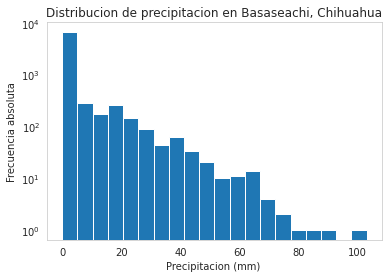

In [ ]:
##Elaboramos histogramos con matplotlib
plt.hist(df_meteo.Precip,bins=20)
plt.xlabel('Precipitacion (mm) ')
plt.ylabel('Frecuencia absoluta')
plt.title('Distribucion de precipitacion en Basaseachi, Chihuahua')
plt.grid()
plt.show
##Usamos la escala logaritmica para que se aprecie mejor
plt.yscale('log')

###Graficas de precipitacion

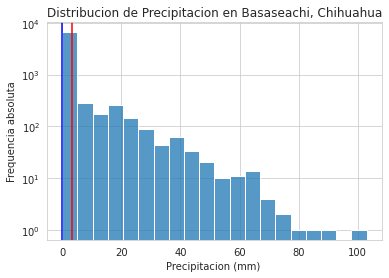

In [ ]:
sns.set_style("whitegrid")
plt.xlabel('Precipitacion (mm) ')
plt.ylabel('Frequencia absoluta')
plt.title('Distribucion de Precipitacion en Basaseachi, Chihuahua')
#sns.histplot(data=df_meteo,x='Precip',bins=20)
#Agregamos para escala logaritmica
Pmed=df_meteo.Precip.median()
Pprom=df_meteo.Precip.mean()
plt.axvline(x=Pmed, color= 'b',label='mediana')
plt.axvline(x=Pprom, color='r',label='promedio')
sns.histplot(data=df_meteo,x='Precip',bins=20,log_scale=(False,True));

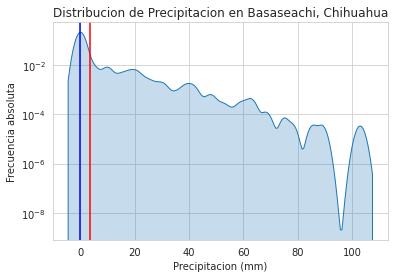

In [ ]:
sns.set_style("whitegrid")
plt.xlabel('Precipitacion (mm)')
plt.ylabel('Frecuencia absoluta')
plt.title('Distribucion de Precipitacion en Basaseachi, Chihuahua')
sns.kdeplot(data=df_meteo,x='Precip',log_scale=(False,True),fill=True);
#sns.kdeplot(df_meteo.Precip,fill=True)
#Hay que recordar que esta normalizada y a parte tiene la escala de logaritmo
plt.axvline(x=Pmed, color= 'b',label='mediana')
plt.axvline(x=Pprom, color='r',label='promedio')
plt.show()

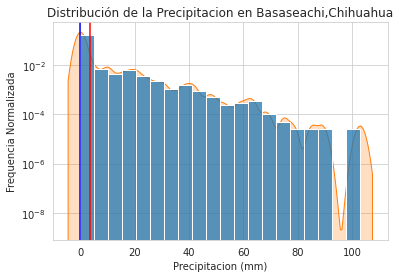

In [ ]:
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Precip', bins=20, stat='density',log_scale=(False,True));
sns.kdeplot(df_meteo.Precip, fill=True,log_scale=(False,True));

plt.axvline(x=Pmed, color= 'b',label='mediana')
plt.axvline(x=Pprom, color='r',label='promedio')

plt.xlabel('Precipitacion (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitacion en Basaseachi,Chihuahua')

plt.show()

###Histogramas de temperaturas maximas y minimas

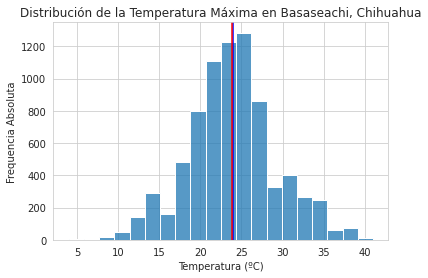

In [ ]:
sns.set_style("whitegrid")
Tmed = df_meteo.Tmax.median() 
Tprom = df_meteo.Tmax.mean()
sns.histplot(data=df_meteo, x='Tmax', bins=20);
# Líneas verticales ubicadas en la mediana y promedio
plt.axvline(x = Tmed, color = 'b', label = 'm') 
plt.axvline(x = Tprom, color = 'r', label = 'x')

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en Basaseachi, Chihuahua')

plt.show()

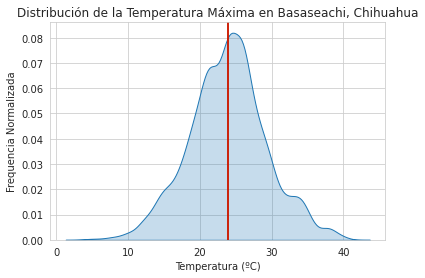

24.0
23.878886756238003


In [ ]:
#grafica de KDE(Kernel Density Estimate)
#AKA grafica de la funcion de densidad de probabilidad
sns.set_style("whitegrid")
sns.kdeplot(df_meteo.Tmax, fill=True);
plt.axvline(Tmed, color = 'g'); 
plt.axvline(Tprom, color = 'r');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Basaseachi, Chihuahua')

plt.show()
print(Tmed)
print(Tprom)

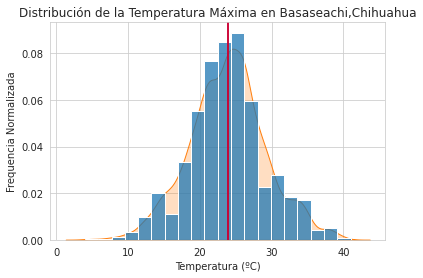

In [ ]:
# Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Tmax', bins=20, stat='density');
sns.kdeplot(df_meteo.Tmax, fill=True);

plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'r');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Basaseachi,Chihuahua')

plt.show()

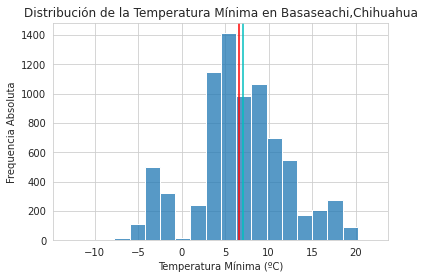

In [ ]:
# Gráfica de la Temperatura Mínima
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmmed = df_meteo.Tmin.median() 
Tmprom = df_meteo.Tmin.mean()

sns.histplot(data=df_meteo, x='Tmin', bins=20);
plt.axvline(Tmmed, color = 'c'); 
plt.axvline(Tmprom, color = 'r');

plt.xlabel('Temperatura Mínima (ºC)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en Basaseachi,Chihuahua')
sns.color_palette("pastel")
plt.show()

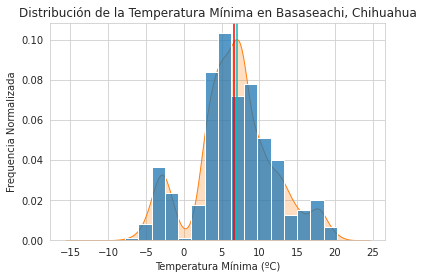

In [ ]:
##Hacemos la grafica sobrepuesta
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Tmin', bins=20, stat='density');
sns.kdeplot(df_meteo.Tmin, fill=True);

plt.axvline(Tmmed, color = 'c'); 
plt.axvline(Tmprom, color = 'r');

plt.xlabel('Temperatura Mínima (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Basaseachi, Chihuahua')

plt.show()

##Actividad 3

###Graficas de cajas de Temperaturas Maximas

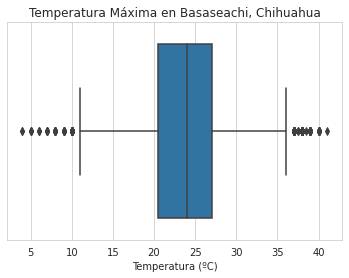

In [ ]:
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmax, data=df_meteo, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Máxima en Basaseachi, Chihuahua');
                                                     

###Grafico de cajas para temperatura minima

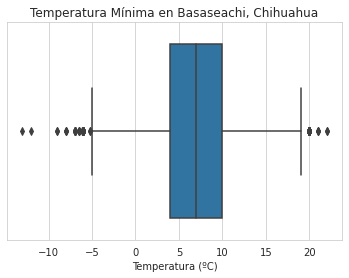

In [ ]:
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmin, data=df_meteo, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Mínima en Basaseachi, Chihuahua');

##Actividad 4

###Precipitacion en los 24 años de registro agrupado por año


Text(0.5, 1.0, 'Precipitación Promedio y barras de error para Basaseachi, Chihuahua')

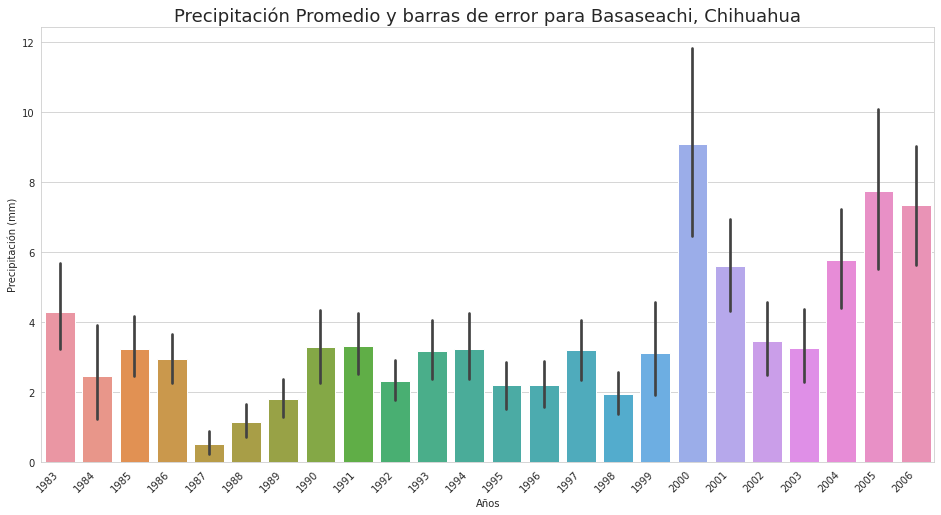

In [ ]:
df_00 = df_meteo[(df_meteo['Año'] >= 1983) & (df_meteo['Año'] < 2007)]
##No acompleto mas que 6 peridos de 5 años


#df_30 = df_meteo[(df_meteo['Año'] >= 1983) & (df_meteo['Año'] < 1993)]
#df_60 = df_meteo[(df_meteo['Año'] >= 1993) & (df_meteo['Año'] < 2003)]
#df_90 = df_meteo[(df_meteo['Año'] >= 2003) & (df_meteo['Año'] < 2007)]

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_00);
# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Basaseachi, Chihuahua',
          fontsize=18)

###Precipitacion en los 24 años de registro agrupado por mes


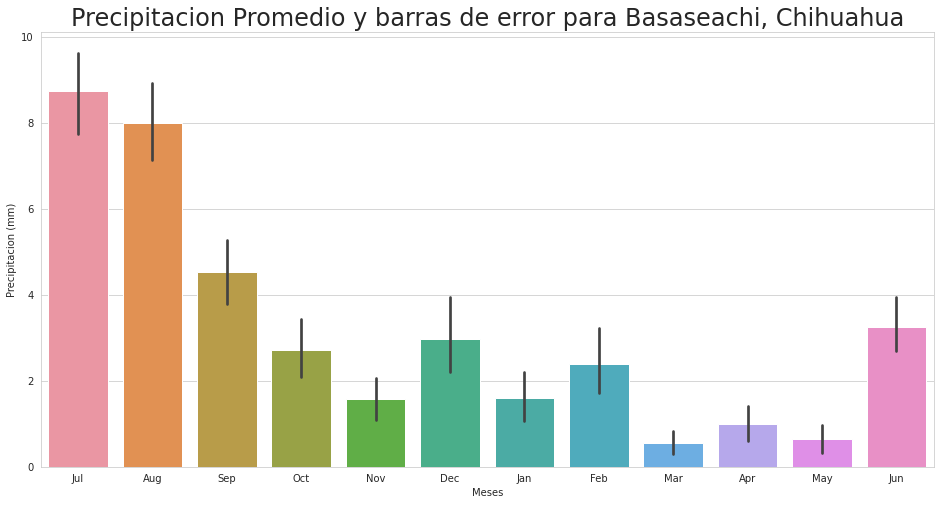

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip',data=df_00);
plt.xlabel('Meses')
plt.ylabel('Precipitacion (mm)')
plt.title('Precipitacion Promedio y barras de error para Basaseachi, Chihuahua',
          fontsize=24)
plt.show()

##Actividad 5

###Precipitacion grafico de linea

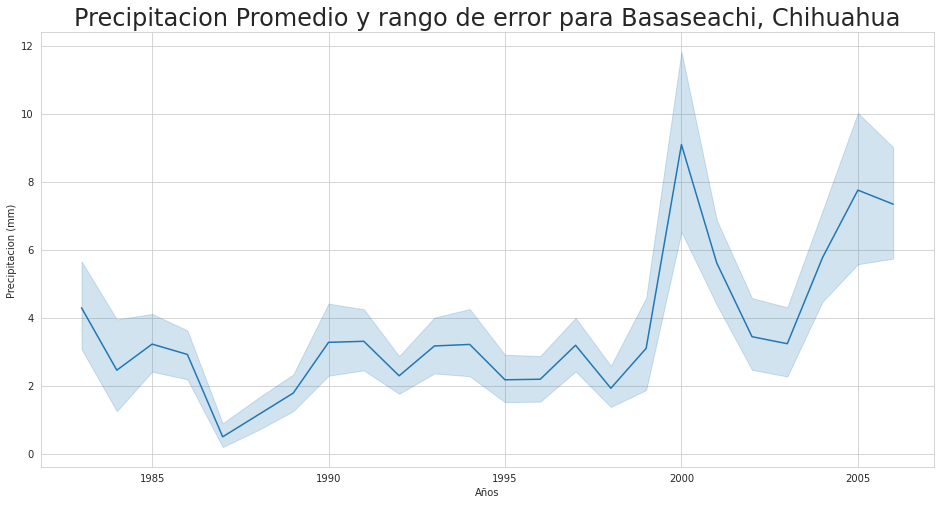

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año',y='Precip',data=df_00);

plt.xlabel('Años')
plt.ylabel('Precipitacion (mm) ')
plt.title('Precipitacion Promedio y rango de error para Basaseachi, Chihuahua',
          fontsize=24)

plt.show()

###Grafico de linea de temperaturas de 1983 a 2007

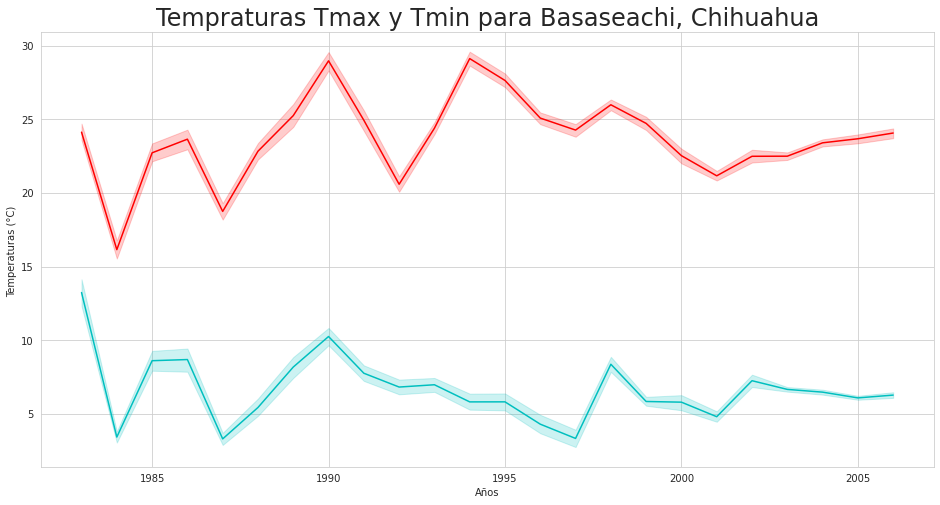

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año',y='Tmax',data=df_00,color='r');
sns.lineplot(x='Año',y='Tmin',data=df_00,color='c');

plt.xlabel('Años')
plt.ylabel('Temperaturas (°C) ')
plt.title('Tempraturas Tmax y Tmin para Basaseachi, Chihuahua',
          fontsize=24)

plt.show()


##Actividad 6



###Graficas Boxplot agrupado por mes

Temperaturas maximas

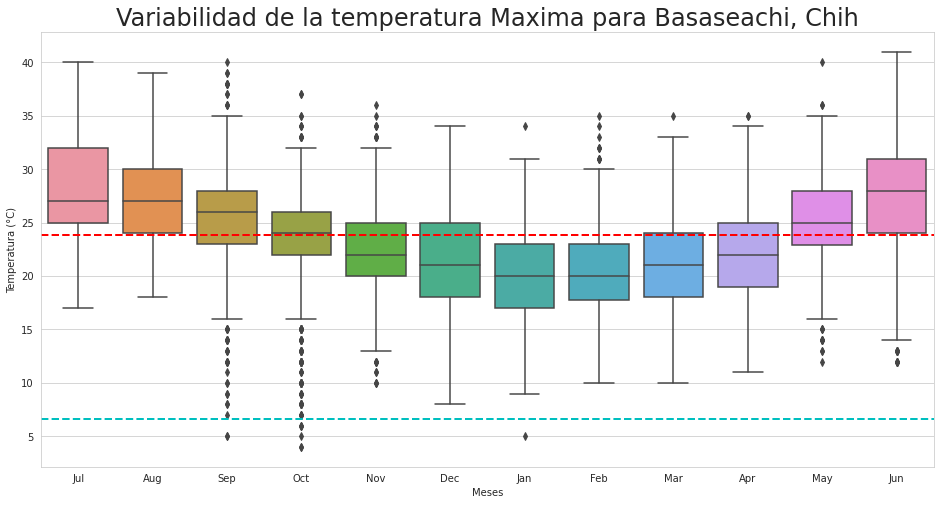

mean(Tmax) =  23.878886756238003
mean(Tmin) =  6.59819670034522
Diff Tmax_ave-Tmin_ave =  17.280690055892784


In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

#Promedios
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

#Graficando
g=sns.boxplot(x='Mes',y='Tmax',data=df_00);
#lineas de promedio
plt.axhline(Tmax_ave,color='r',linestyle='--',linewidth=2);
plt.axhline(Tmin_ave,color='c',linestyle='--',linewidth=2);

#Rotamos etiquetas
plt.xlabel('Meses')
plt.ylabel('Temperatura (°C)')
plt.title('Variabilidad de la temperatura Maxima para Basaseachi, Chih',
          fontsize=24)

plt.show()

#mostramos las temperaturas
print('mean(Tmax) = ',Tmax_ave)
print('mean(Tmin) = ',Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave ))


Grafica de boxplot para temperaturas minimas

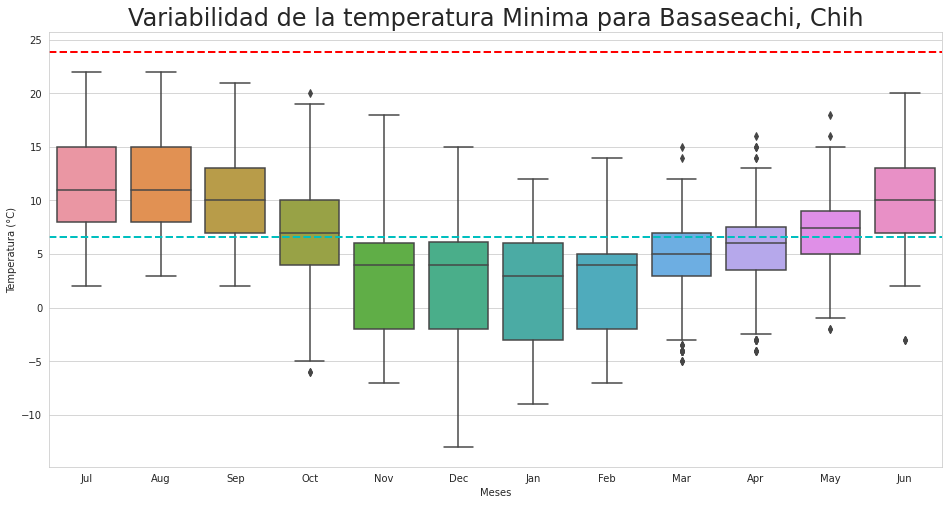

mean(Tmax) =  23.878886756238003
mean(Tmin) =  6.59819670034522
Diff Tmax_ave-Tmin_ave =  17.280690055892784


In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

#Promedios
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

#Graficando
g=sns.boxplot(x='Mes',y='Tmin',data=df_00);
#lineas de promedio
plt.axhline(Tmax_ave,color='r',linestyle='--',linewidth=2);
plt.axhline(Tmin_ave,color='c',linestyle='--',linewidth=2);

#Rotamos etiquetas
plt.xlabel('Meses')
plt.ylabel('Temperatura (°C)')
plt.title('Variabilidad de la temperatura Minima para Basaseachi, Chih',
          fontsize=24)

plt.show()

#mostramos las temperaturas
print('mean(Tmax) = ',Tmax_ave)
print('mean(Tmin) = ',Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave ))
